# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Analysis Results -> 


1. Latitude and Temparatures are correlated. The closer the city is to the equator the warmer it is and viceversa. 
2. There is no correlation between Latitude and Humidity as the plot shows high humidity across all latitudes.
3. There is no correlation between Latitide and Wind Speed as the wind speed varies across all latitudes.

In [20]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

current_time = datetime.now()
current_date = current_time.strftime('%m/%d/%Y')


## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

city_df = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
i = 1 
set = 1

settings = {"units": "imperial", "appid": api_key}

print("Beginning Data Retrieval")     
print("-----------------------------")
    
for city in cities:
    
    try:
        data = owm.get_current(city, **settings)     
        
        city_df.append({         'City' :  data['name'],
        'Cloudiness' : data['clouds']['all'],
        'Country' : data['sys']['country'],
        'Date' : data['dt'],
        'Humidity' : data['main']['humidity'],
        'Lat' : data['coord']['lat'],
        'Lng' : data['coord']['lon'],
        'Max temp' : data['main']['temp_max'],
        'Wind Speed' : data['wind'] ['speed']
                        })
        print(f"Processing Record {i} of Set {set} | {city}")
        
    except:
        print("City not found. Skipping...")   
        i = 0
        set = set + 1

    i = i + 1

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | saint-georges
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | barrow
City not found. Skipping...
Processing Record 1 of Set 2 | tuktoyaktuk
Processing Record 2 of Set 2 | dikson
Processing Record 3 of Set 2 | sioux lookout
Processing Record 4 of Set 2 | atuona
Processing Record 5 of Set 2 | busselton
Processing Record 6 of Set 2 | kruisfontein
Processing Record 7 of Set 2 | komsomolskiy
Processing Record 8 of Set 2 | rikitea
City not found. Skipping...
Processing Record 1 of Set 3 | torbay
Processing Record 2 of Set 3 | carnarvon
Processing Record 3 of Set 3 | inhambane
Processing Record 4 of Set 3 | port alfred
Processing Record 5 of Set 3 | togur
Processing Record 6 of Set 3 | coahuayana
Processing Record 7 of Set 3 | broken hill
Processing Record 8 of Set 3 | bua

Processing Record 4 of Set 20 | sakaiminato
Processing Record 5 of Set 20 | rio gallegos
Processing Record 6 of Set 20 | pangai
Processing Record 7 of Set 20 | saint george
Processing Record 8 of Set 20 | hithadhoo
Processing Record 9 of Set 20 | avera
Processing Record 10 of Set 20 | numaligarh
Processing Record 11 of Set 20 | capesterre-belle-eau
Processing Record 12 of Set 20 | pentecoste
Processing Record 13 of Set 20 | tingo maria
Processing Record 14 of Set 20 | povenets
Processing Record 15 of Set 20 | santa isabel
City not found. Skipping...
Processing Record 1 of Set 21 | phonhong
Processing Record 2 of Set 21 | srandakan
Processing Record 3 of Set 21 | lagoa
Processing Record 4 of Set 21 | broome
City not found. Skipping...
Processing Record 1 of Set 22 | lodwar
Processing Record 2 of Set 22 | sistranda
City not found. Skipping...
Processing Record 1 of Set 23 | sao filipe
Processing Record 2 of Set 23 | faya
Processing Record 3 of Set 23 | elat
Processing Record 4 of Set 23 

Processing Record 6 of Set 37 | saint-raymond
City not found. Skipping...
Processing Record 1 of Set 38 | nadym
Processing Record 2 of Set 38 | ambilobe
Processing Record 3 of Set 38 | mahina
Processing Record 4 of Set 38 | iqaluit
Processing Record 5 of Set 38 | kibala
Processing Record 6 of Set 38 | am timan
City not found. Skipping...
Processing Record 1 of Set 39 | harrisburg
Processing Record 2 of Set 39 | antalaha
Processing Record 3 of Set 39 | maceio
Processing Record 4 of Set 39 | athabasca
Processing Record 5 of Set 39 | raudeberg
Processing Record 6 of Set 39 | cidreira
Processing Record 7 of Set 39 | honiara
Processing Record 8 of Set 39 | harper
City not found. Skipping...
Processing Record 1 of Set 40 | heinola
Processing Record 2 of Set 40 | san rafael
Processing Record 3 of Set 40 | lahij
City not found. Skipping...
Processing Record 1 of Set 41 | barguzin
Processing Record 2 of Set 41 | fukue
Processing Record 3 of Set 41 | iquitos
City not found. Skipping...
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_data = pd.DataFrame(city_df)  
weather_data.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max temp      534
Wind Speed    534
dtype: int64

In [24]:
weather_data.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max temp,Wind Speed
0,Vaini,0,IN,1552798800,42,15.34,74.49,84.20,3.36
1,Hermanus,68,ZA,1552799799,99,-34.42,19.24,64.99,1.01
2,Saint-Georges,76,CA,1552799843,66,46.12,-70.67,19.99,7.00
3,Hilo,40,US,1552800035,73,19.71,-155.08,73.40,4.70
4,Bredasdorp,88,ZA,1552799799,99,-34.53,20.04,64.99,1.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

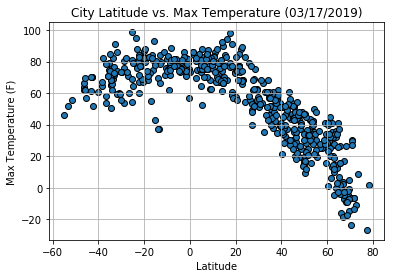

In [38]:
City_Lat = weather_data[['Lat']]
City_Max_temp = weather_data[['Max temp']]
plt.scatter(City_Lat, City_Max_temp,marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.grid()
plt.savefig('output_data/Temp_plot.png')
plt.show()

#### Latitude vs. Humidity Plot

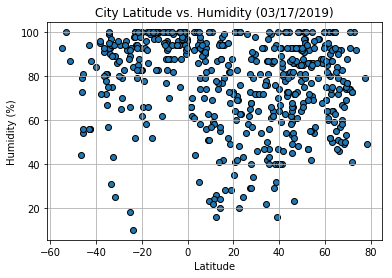

In [34]:
City_Lat = weather_data[['Lat']]
City_Humidity = weather_data[['Humidity']]
plt.scatter(City_Lat, City_Humidity,marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid()
plt.savefig('output_data/Humidity_plot.png')
plt.show()

#### Latitude vs. Cloudiness Plot

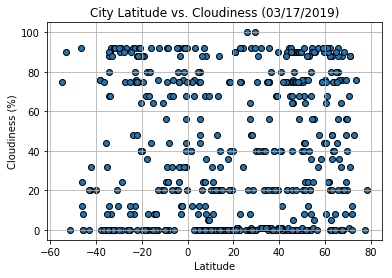

In [35]:
City_Lat = weather_data[['Lat']]
City_Cloudiness = weather_data[['Cloudiness']]
plt.scatter(City_Lat, City_Cloudiness,marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid()
plt.savefig('output_data/Cloudiness_plot.png')
plt.show()

#### Latitude vs. Wind Speed Plot

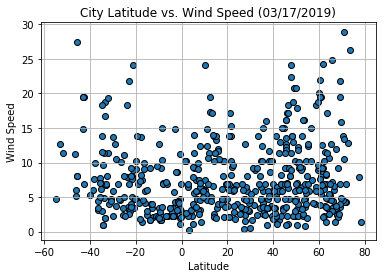

In [37]:
City_Lat = weather_data[['Lat']]
City_Wind_Speed = weather_data[['Wind Speed']]
plt.scatter(City_Lat, City_Wind_Speed,marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid()
plt.savefig('output_data/Wind_Speed_plot.png')
plt.show()

In [31]:
# Save the data to cities.csv
weather_data.to_csv(output_data_file)